In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('RELIANCE.NS.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-13,2433.000000,2433.000000,2368.050049,2371.550049,2364.431396,7527598
1,2021-09-14,2375.000000,2394.000000,2366.000000,2368.449951,2361.340576,4111205
2,2021-09-15,2368.500000,2395.750000,2368.500000,2378.300049,2371.161133,4186300
3,2021-09-16,2381.550049,2436.750000,2367.000000,2428.199951,2420.911133,6206657
4,2021-09-17,2446.000000,2455.850098,2375.600098,2390.550049,2383.374268,16098099
...,...,...,...,...,...,...,...
243,2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785
244,2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172
245,2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942
246,2022-09-08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840


In [3]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,2433.000000,2433.000000,2368.050049,2371.550049,2364.431396,7527598
2021-09-14,2375.000000,2394.000000,2366.000000,2368.449951,2361.340576,4111205
2021-09-15,2368.500000,2395.750000,2368.500000,2378.300049,2371.161133,4186300
2021-09-16,2381.550049,2436.750000,2367.000000,2428.199951,2420.911133,6206657
2021-09-17,2446.000000,2455.850098,2375.600098,2390.550049,2383.374268,16098099
...,...,...,...,...,...,...
2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785
2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172
2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942


In [4]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
Date,,
2021-09-13,61.449951,64.949951
2021-09-14,6.550049,28.000000
2021-09-15,-9.800049,27.250000
2021-09-16,-46.649902,69.750000
2021-09-17,55.449951,80.250000


In [5]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0])

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


# HERE WE ARE APPLYING SUPPROT VECTOR CLASSIFIER

In [7]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [8]:
df['Predicted_Signal'] = cls.predict(X)


In [9]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()


In [10]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [11]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2021-09-13,2433.000000,2433.000000,2368.050049,2371.550049,2364.431396,7527598,61.449951,64.949951,1,NaN,NaN,NaN
2021-09-14,2375.000000,2394.000000,2366.000000,2368.449951,2361.340576,4111205,6.550049,28.000000,1,-0.001307,-0.001307,-0.001307
2021-09-15,2368.500000,2395.750000,2368.500000,2378.300049,2371.161133,4186300,-9.800049,27.250000,1,0.004159,0.004159,0.002852
2021-09-16,2381.550049,2436.750000,2367.000000,2428.199951,2420.911133,6206657,-46.649902,69.750000,0,0.020981,0.020981,0.023833
2021-09-17,2446.000000,2455.850098,2375.600098,2390.550049,2383.374268,16098099,55.449951,80.250000,1,-0.015505,-0.000000,0.008328
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,-38.800049,50.500000,0,0.015531,0.015531,0.119805
2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,-23.850098,34.000000,1,0.010526,0.000000,0.130331
2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,-6.750000,24.899902,1,-0.005815,-0.005815,0.124516


Calculate Strategy Cumulative Returns

In [12]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2021-09-13,2433.000000,2433.000000,2368.050049,2371.550049,2364.431396,7527598,61.449951,64.949951,1,NaN,NaN,NaN,NaN
2021-09-14,2375.000000,2394.000000,2366.000000,2368.449951,2361.340576,4111205,6.550049,28.000000,1,-0.001307,-0.001307,-0.001307,-0.001307
2021-09-15,2368.500000,2395.750000,2368.500000,2378.300049,2371.161133,4186300,-9.800049,27.250000,1,0.004159,0.004159,0.002852,0.002852
2021-09-16,2381.550049,2436.750000,2367.000000,2428.199951,2420.911133,6206657,-46.649902,69.750000,0,0.020981,0.020981,0.023833,0.023833
2021-09-17,2446.000000,2455.850098,2375.600098,2390.550049,2383.374268,16098099,55.449951,80.250000,1,-0.015505,-0.000000,0.008328,0.023833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,-38.800049,50.500000,0,0.015531,0.015531,0.119805,0.289881
2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,-23.850098,34.000000,1,0.010526,0.000000,0.130331,0.289881
2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,-6.750000,24.899902,1,-0.005815,-0.005815,0.124516,0.284066


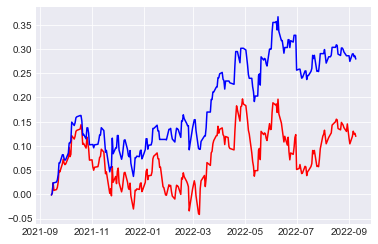

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')
